# TODO: IMPROVE

In [19]:
# Import external libraries
import numpy as np
import pandas as pd

# Set VDDIO
vddio = 33

In [20]:
# SET sweep data
setdata = pd.read_csv(f"../data/sweep/setsweep{vddio}.csv.gz", delimiter="\t", names=["addr", "t", "vwl", "vbl", "pw"] + [f"gi[{i}]" for i in range(48)] + [f"gf[{i}]" for i in range(48)])
setdata = pd.concat([setdata[["addr","t","vwl","vbl","pw",f"gi[{i}]",f"gf[{i}]"]].rename(columns={f"gi[{i}]" : "gi", f"gf[{i}]" : "gf"}) for i in range(48)])
setdata

,addr,t,vwl,vbl,pw,gi,gf
0,46141,1.698431e+09,0,0,1,8,8
1,11735,1.698431e+09,0,1,1,7,7
2,41965,1.698431e+09,0,2,1,9,9
3,24212,1.698431e+09,0,3,1,7,7
4,63363,1.698431e+09,0,4,1,8,9
...,...,...,...,...,...,...,...
65531,23238,1.698433e+09,0,27,1,10,63
65532,31020,1.698433e+09,0,28,1,7,64
65533,55327,1.698433e+09,0,29,1,6,64
65534,57247,1.698433e+09,0,30,1,10,64


In [21]:
# Process SET sweep
gf2vbl = {}
gmax = 0
d = setdata[(setdata["gi"].isin(range(1,20))) & (setdata["pw"] == 1) & (setdata["vwl"] == 0)][["vwl","vbl","pw","gi","gf"]]
for vbl, data in d.groupby("vbl"):
    gf = int(data.quantile(0.999)["gf"])
    for g in range(gmax, gf):
        gf2vbl[g] = vbl
    gmax = gf
gf2vbl[63] = 30
print(gf2vbl)
d.groupby("vbl").quantile(0.999)["gf"]

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 1, 19: 2, 20: 2, 21: 2, 22: 2, 23: 2, 24: 2, 25: 2, 26: 2, 27: 2, 28: 2, 29: 2, 30: 2, 31: 2, 32: 2, 33: 2, 34: 2, 35: 3, 36: 3, 37: 3, 38: 3, 39: 3, 40: 3, 41: 4, 42: 4, 43: 4, 44: 4, 45: 5, 46: 5, 47: 6, 48: 6, 49: 7, 50: 8, 51: 9, 52: 9, 53: 9, 54: 10, 55: 11, 56: 11, 57: 12, 58: 13, 59: 13, 60: 14, 61: 15, 62: 16, 63: 30}


vbl
0     18.000
1     19.000
2     35.000
3     41.000
4     45.000
5     47.000
6     49.000
7     50.000
8     51.631
9     54.000
10    55.000
11    57.000
12    58.000
13    60.000
14    61.000
15    62.000
16    63.000
17    64.000
18    64.000
19    64.000
20    64.000
21    64.000
22    64.000
23    64.000
24    64.000
25    64.000
26    64.000
27    64.000
28    64.000
29    64.000
30    64.000
31    64.000
Name: gf, dtype: float64

<AxesSubplot:xlabel='gf'>

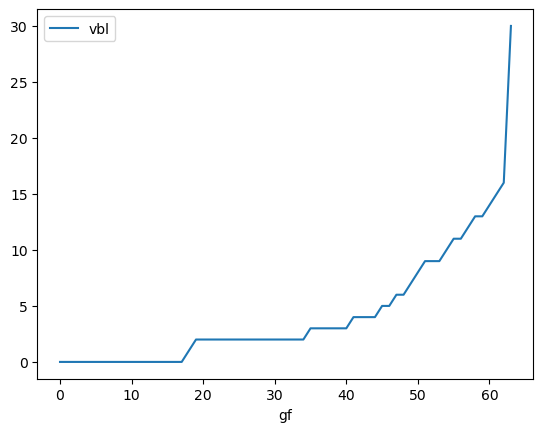

In [22]:
# Plot start VBL
gf2vbl = pd.DataFrame(gf2vbl.items(), columns=["gf","vbl"])
gf
gf2vbl.plot("gf", "vbl")